In [1]:
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pickle
import re
from collections import defaultdict

In [ ]:
a = pickle.load(open("matched_files.pkl", 'rb'))

def retrieveTimeFrame(img, ):
    if 'mel' in img:
        n = int(re.match(r'(\d+){1}', img)[0])
        img = img.replace(str(n), str(n//10))

    new_key = a[img].split('/')[1]+"/"+a[img].split('/')[2]
    t = benign_case[new_key]
    t2 = mel_case[new_key]
    cases = benign_case[new_key] if "mel" not in img else mel_case[new_key]
    num_data_points = len(cases)
    middle_point = num_data_points//2
    if num_data_points == 0:
        raise

    cases = sorted(cases)
    t = a[img].split('/')[-1]
    num = cases.index(t)

    return num/(num_data_points-1)

In [ ]:
def retrieveScores(img, num):

    recod_file = "%sisbi2017-rc36xtrm.txt%s" % (data_path_recod, num)
    dermok_file = "%spredictions_%s" %(data_path_dermok, num)
    scores = []
    flag = False 
    with open(recod_file, "r") as recod, open(dermok_file, "r") as dermo:
        for line in recod.readlines():
            try:
                f, score = line.strip().split(',')
                if f+".jpg" == img:
                    score = float(score)
                    scores.append([1-score, score])
                    flag = True
                    break
            except ValueError:
                #print("Skipping: ", line.split())
                continue
        if not flag: raise Exception("Can't find img RECOD")

        for line in dermo.readlines():
            f, score1, score2 = line.split()
            if f == img:
                score1 = float(score1); score2 = float(score2)
                scores.append([score1, score2])
                flag = False
                break

        if flag: raise Exception("Can't find img DERMO")

    return scores

In [33]:
d_dict = defaultdict(lambda: [])
#match_names = pickle.load(open("matched_files.pkl", 'rb'))

benign_case = defaultdict(lambda: [])
mel_case = defaultdict(lambda: [])

for k in pickled_data:
    new_key = a[k].split('/')[1]+"/"+a[k].split('/')[2]
    t = a[k].split('/')[-1]
    if 'mel' in k:
        mel_case[new_key].append(t)
    else:
        benign_case[new_key].append(t)

KeyError: '1000_mel.jpg'

In [32]:
print(list(d_dict.items())[0])
print(len(d_dict))

('Excised - Benign/HRMC_25/5', [[83, 1, 1], [137, 0, 1]])
481


In [4]:
first_image = 0
last_image = 0

first_image_pred = []
last_image_pred = []
first_image_trth = []
last_image_trth = []

candidates = []

total = 0

for key in d_dict:
    lists = d_dict[key]
    
    #Indexes 
    # 1 = Pred #2 = Grth Trth
    
    #if len(lists) <= 2:
        #print("Too few?", key, "len", len(lists))
    
    # If image is not Melanoma we skip it
    #if lists[0][2] != 1:
    #    continue
    
    if lists[0][1] == lists[0][2]:
        first_image += 1
    
    if lists[-1][1] == lists[-1][2]:
        last_image += 1
    
    first_image_pred.append(lists[0][1])
    last_image_pred.append(lists[-1][1])
    first_image_trth.append(lists[0][2])
    last_image_trth.append(lists[-1][2])
    
    if first_image_pred[-1] != last_image_pred[-1]:
        candidates.append(key)
    
    total += 1

In [5]:
print(first_image, last_image, total)
print(len(d_dict))

385 386 481
481


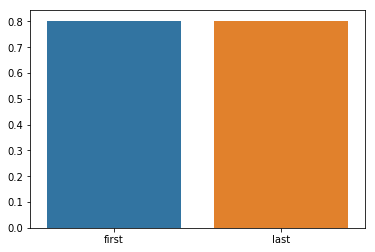

In [6]:
data = [first_image/total, last_image/total]

ax = sns.barplot(x=["first", "last"], y=data)
ax

In [7]:
plt.tight_layout(h_pad=2)

<Figure size 432x288 with 0 Axes>

In [8]:
plt.show()

In [9]:
print('First frame acc overall', metrics.accuracy_score(first_image_trth, first_image_pred))
print('Last frame acc overall', metrics.accuracy_score(last_image_trth, last_image_pred))

First frame acc overall 0.8004158004158004
Last frame acc overall 0.8024948024948025


In [10]:
print('First frame acc confusion matrix')
print(metrics.confusion_matrix(first_image_trth, first_image_pred))
# Confusion Matrix
# [ benign_T, benign_F ]
# [ mel_F, mel_T]

First frame acc confusion matrix
[[376  78]
 [ 18   9]]


In [11]:
print(metrics.confusion_matrix(last_image_trth, last_image_pred))

[[377  77]
 [ 18   9]]


In [12]:
print(candidates)

['No excision - benign/HRMC_73/5', 'No excision - benign/HRMC_73/3', 'No excision - benign/HRMC_73/4', 'No excision - benign/HRMC_12/4', 'No excision - benign/HRMC_59/1', 'No excision - benign/HRMC_24/4', 'No excision - benign/HRMC_41/1', 'No excision - benign/HRMC_41/6', 'No excision - benign/HRMC_23/7', 'No excision - benign/HRMC_23/1', 'No excision - benign/HRMC_23/6', 'No excision - benign/HRMC_1/9', 'No excision - benign/HRMC_1/4', 'No excision - benign/HRMC_29/14', 'No excision - benign/HRMC_29/6', 'No excision - benign/HRMC_29/12', 'Excised - Melanoma/HRMC_7/2', 'No excision - benign/HRMC_19/1', 'No excision - benign/HRMC_19/8', 'No excision - benign/HRMC_19/6', 'No excision - benign/HRMC_108/5', 'No excision - benign/HRMC_7/3', 'No excision - benign/HRMC_7/6', 'No excision - benign/HRMC_46/4', 'No excision - benign/HRMC_69/10', 'No excision - benign/HRMC_69/3', 'No excision - benign/HRMC_71/2', 'No excision - benign/HRMC_28/4', 'No excision - benign/HRMC_82/3', 'No excision - b

In [15]:
import dill as pickle
pickle.dump(d_dict, open("temp.dump", "wb+"))